# **Bicycles Sales Report**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings('ignore')

In [2]:
finance = pd.read_csv('financials.csv')

In [3]:
finance.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


### **Rough read**

In [4]:
finance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

### **Clean**

In [5]:
# remove extra spaces, " " to "_", and lowercase

for col in finance.columns:
    finance.rename(columns={col: col.strip().replace(' ', '_').lower()}, inplace=True)

finance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   segment              700 non-null    object
 1   country              700 non-null    object
 2   product              700 non-null    object
 3   discount_band        700 non-null    object
 4   units_sold           700 non-null    object
 5   manufacturing_price  700 non-null    object
 6   sale_price           700 non-null    object
 7   gross_sales          700 non-null    object
 8   discounts            700 non-null    object
 9   sales                700 non-null    object
 10  cogs                 700 non-null    object
 11  profit               700 non-null    object
 12  date                 700 non-null    object
 13  month_number         700 non-null    int64 
 14  month_name           700 non-null    object
 15  year                 700 non-null    int64 
dtypes: int64

In [6]:
finance.head()

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [7]:
for i in finance.columns:
    print(f"{i} ({finance[i].nunique()}) : {finance[i].unique()} \n")

segment (5) : ['Government' 'Midmarket' 'Channel Partners' 'Enterprise' 'Small Business'] 

country (5) : ['Canada' 'Germany' 'France' 'Mexico' 'United States of America'] 

product (6) : [' Carretera ' ' Montana ' ' Paseo ' ' Velo ' ' VTT ' ' Amarilla '] 

discount_band (4) : [' None ' ' Low ' ' Medium ' ' High '] 

units_sold (510) : [' $1,618.50 ' ' $1,321.00 ' ' $2,178.00 ' ' $888.00 ' ' $2,470.00 '
 ' $1,513.00 ' ' $921.00 ' ' $2,518.00 ' ' $1,899.00 ' ' $1,545.00 '
 ' $2,665.50 ' ' $958.00 ' ' $2,146.00 ' ' $345.00 ' ' $615.00 '
 ' $292.00 ' ' $974.00 ' ' $1,006.00 ' ' $367.00 ' ' $883.00 ' ' $549.00 '
 ' $788.00 ' ' $2,472.00 ' ' $1,143.00 ' ' $1,725.00 ' ' $912.00 '
 ' $2,152.00 ' ' $1,817.00 ' ' $1,493.00 ' ' $1,804.00 ' ' $2,161.00 '
 ' $2,821.00 ' ' $2,001.00 ' ' $2,838.00 ' ' $1,527.00 ' ' $2,151.00 '
 ' $2,750.00 ' ' $1,953.00 ' ' $4,219.50 ' ' $1,686.00 ' ' $2,141.00 '
 ' $3,945.00 ' ' $2,296.00 ' ' $1,030.00 ' ' $639.00 ' ' $1,326.00 '
 ' $1,858.00 ' ' $1,210.00 ' ' $2,5

In [8]:
num_cols = ["units_sold","manufacturing_price","sale_price","gross_sales","discounts","sales","cogs","profit"]
    
for col in num_cols:
	finance[col] = finance[col].str.replace("$","").str.replace(",","").str.replace('-','0').str.replace('(', '').str.replace(')','').astype(float)

In [9]:
finance.head()

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,01/06/2014,6,June,2014


In [10]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   segment              700 non-null    object 
 1   country              700 non-null    object 
 2   product              700 non-null    object 
 3   discount_band        700 non-null    object 
 4   units_sold           700 non-null    float64
 5   manufacturing_price  700 non-null    float64
 6   sale_price           700 non-null    float64
 7   gross_sales          700 non-null    float64
 8   discounts            700 non-null    float64
 9   sales                700 non-null    float64
 10  cogs                 700 non-null    float64
 11  profit               700 non-null    float64
 12  date                 700 non-null    object 
 13  month_number         700 non-null    int64  
 14  month_name           700 non-null    object 
 15  year                 700 non-null    int

In [11]:
# convert the date object to  datetime 

finance['date'] = pd.to_datetime(finance['date'])



In [12]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   segment              700 non-null    object        
 1   country              700 non-null    object        
 2   product              700 non-null    object        
 3   discount_band        700 non-null    object        
 4   units_sold           700 non-null    float64       
 5   manufacturing_price  700 non-null    float64       
 6   sale_price           700 non-null    float64       
 7   gross_sales          700 non-null    float64       
 8   discounts            700 non-null    float64       
 9   sales                700 non-null    float64       
 10  cogs                 700 non-null    float64       
 11  profit               700 non-null    float64       
 12  date                 700 non-null    datetime64[ns]
 13  month_number         700 non-null  

In [13]:
finance.head()

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-01-06,6,June,2014


### **Explore**

#### **Profitability Analysis by Market Segment and Region**
   - **Objective:** Identify the most profitable market segments and regions for the company by analyzing sales, profit margins, and units sold across different market segments and regions. This can guide resource allocation and marketing focus to maximize revenue.
- **Key Insights Needed:** 
     - Which segments and regions have the highest and lowest profit margins?
     - How do discounts and manufacturing prices affect profit margins in different segments?
     - Trends in profitability over time, considering seasonal and regional factors.

In [14]:
finance.describe()

,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354671,1.696091e+05,145475.211429,26354.778271,2013-10-08 15:36:00,7.900000,2013.750000
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,0.000000,2013-01-09 00:00:00,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,3815.707500,2013-10-04 12:00:00,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,11110.550000,2014-01-05 12:00:00,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.347500,2.610775e+05,245607.500000,23756.360000,2014-01-09 06:00:00,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-01-12 00:00:00,12.000000,2014.000000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928760,2.367263e+05,203865.506118,41426.798657,NaN,3.377321,0.433322


In [15]:
finance.head()

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-01-06,6,June,2014


- Which segments and regions have the highest and lowest profit margins?

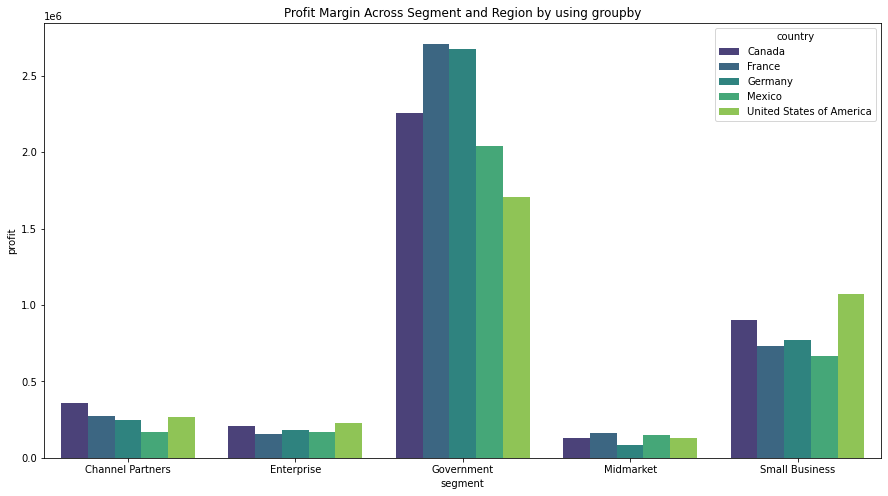

<Figure size 432x288 with 0 Axes>

In [ ]:
#plotting the barplot for segment and region arcoss the profit margin
#two ways to plot the barplot

plt.figure(figsize=(15,8))


# 2nd way
profit = finance.groupby(['segment','country'])['profit'].sum().reset_index()
sns.barplot(x='segment', y='profit', data=profit, hue='country', palette='viridis')
plt.title('Profit Margin Across Segment and Region by using groupby')

plt.show()


insight:
- government give hight prodfit and then small bussiness as campare to other sources
- mexico, germany, france contibute hight amount to campany 
- low amount of midmarket give to campany

 - How do discounts and manufacturing prices affect profit margins in different segments?

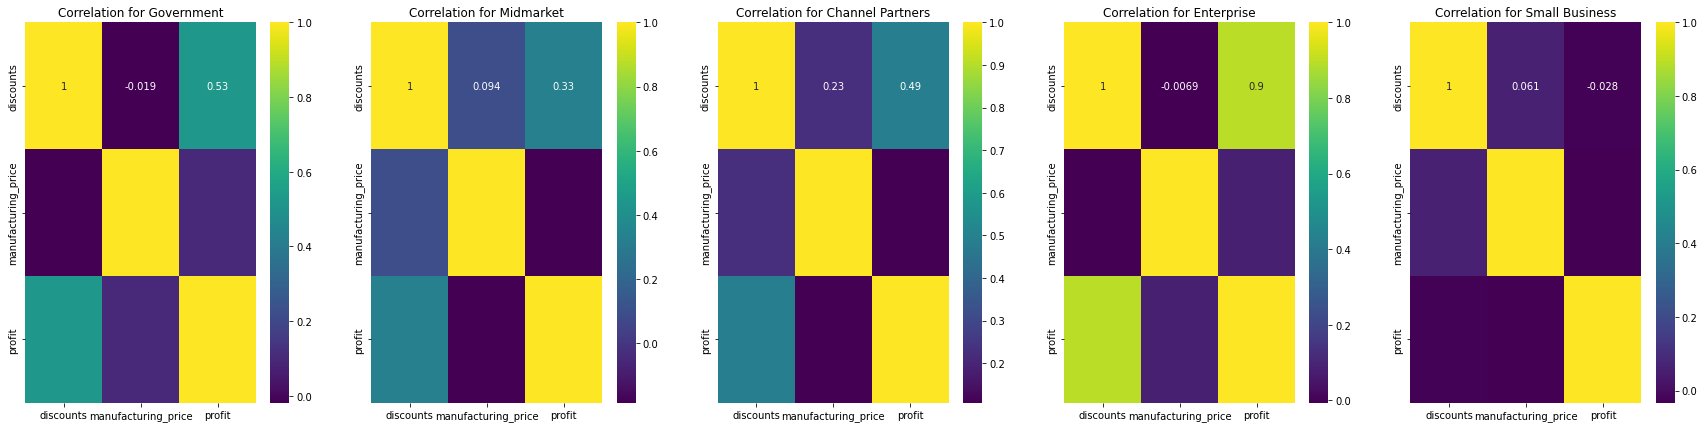

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the heatmap for the correlation matrix in discount, manufacturing_price, profit in different segements

plt.figure(figsize=(30,7))

relation = finance[['discounts','manufacturing_price','profit', 'segment']]

segment_names = relation['segment'].unique().tolist()

for segment in segment_names:

	plt.subplot(1, len(segment_names),  segment_names.index(segment)+1) 

	segment_data = relation[relation['segment'] == segment]
	sns.heatmap(segment_data[['discounts', 'manufacturing_price', 'profit']].corr(), annot=True, cmap='viridis')
	plt.title(f'Correlation for {segment}')

plt.show()

insight : 1. there is not correlation about discount and manufacutring the product

- Trends in profitability over time, considering seasonal and regional factors.

In [18]:
finance['year'].unique()

array([2014, 2013])

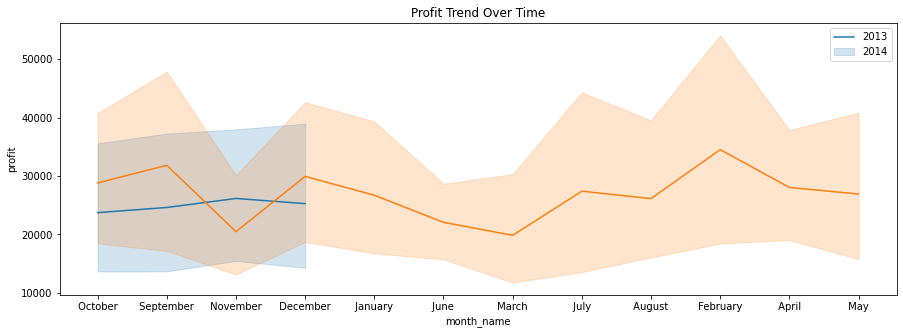

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot the line chart for finding the trend in profit

trend = finance[['profit','date', 'month_number', 'month_name', 'year']]
trend_2013 = trend[trend['year'] == 2013]
trend_2014 = trend[trend['year'] == 2014]

plt.figure(figsize=(15,5))

sns.lineplot(x='month_name', y='profit', data=trend_2013, palette='viridis')
sns.lineplot(x='month_name', y='profit', data=trend_2014, palette='viridis')

plt.title('Profit Trend Over Time')
plt.legend(['2013', '2014'])
plt.show()

insight: 
- in 2013 , only oct to dec data have, in 2013, there is some hip show in Nov
- in 2014 , Sep, Dec, Feb are high show , the remanindig month show low

### 2. **Sales Performance and Discount Impact Analysis**
   - **Objective:** Understand the impact of discount rates on sales volume and revenue across various products, segments, and regions. This insight would allow the company to optimize discount strategies to drive sales without significantly reducing profit margins.
   - **Key Insights Needed:**
     - Correlation between discount levels and sales volume/profit for each segment.
     - Which products respond best to discounts, and in which regions or segments?
     - How does the overall sales trend vary with different discount strategies over time?

- Correlation between discount levels and sales volume/profit for each segment.

In [20]:
finance.columns

Index(['segment', 'country', 'product', 'discount_band', 'units_sold',
       'manufacturing_price', 'sale_price', 'gross_sales', 'discounts',
       'sales', 'cogs', 'profit', 'date', 'month_number', 'month_name',
       'year'],
      dtype='object')

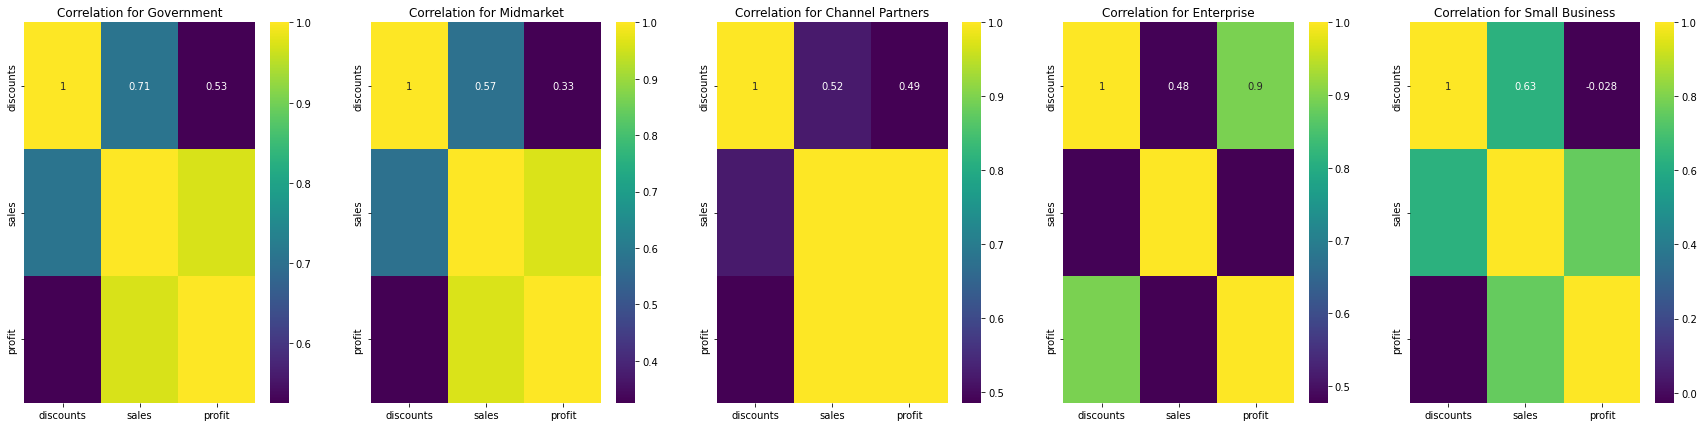

<Figure size 432x288 with 0 Axes>

In [ ]:
discount = finance[['discounts', 'sales', 'profit', 'segment']]

segment_names = discount['segment'].unique().tolist()

plt.figure(figsize=(30,7))
for segment in segment_names:

	plt.subplot(1, len(segment_names),  segment_names.index(segment)+1) 

	segment_data = discount[discount['segment'] == segment]
	sns.heatmap(segment_data[['discounts', 'sales', 'profit']].corr(), annot=True, cmap='viridis')
	plt.title(f'Correlation for {segment}')

plt.show()

insight: 
- there is hight realtion between in discounts, sales, profit
-  but in small bussiness , there low realtion disocunt and profit (that meaning there some amount of loss is going)
-  also enterprise , there low relation discount and profit, discount and sales (that meaning there some loss is going)


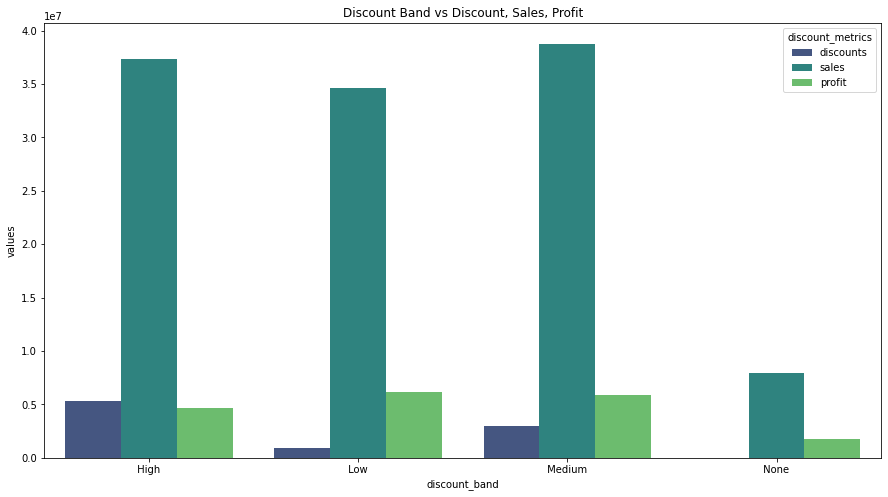

<Figure size 432x288 with 0 Axes>

In [ ]:
discount = finance[['discount_band', 'discounts', 'sales', 'profit', 'segment']].groupby(['discount_band']).sum().reset_index()
discount

plt.figure(figsize=(15,8))
#plot the barplot for discount_band and discount, sales, profit
discount_melt = discount.melt(id_vars='discount_band', value_vars=['discounts', 'sales', 'profit'], var_name='discount_metrics', value_name='values')

sns.barplot(x='discount_band', y='values', data=discount_melt, hue='discount_metrics', palette='viridis')
plt.title('Discount Band vs Discount, Sales, Profit')
plt.show()

insight:
- if we give low amount discount it is ok for bussiness
- there is no need to give high level of dicount if no need 

 - Which products respond best to discounts, and in which regions or segments?

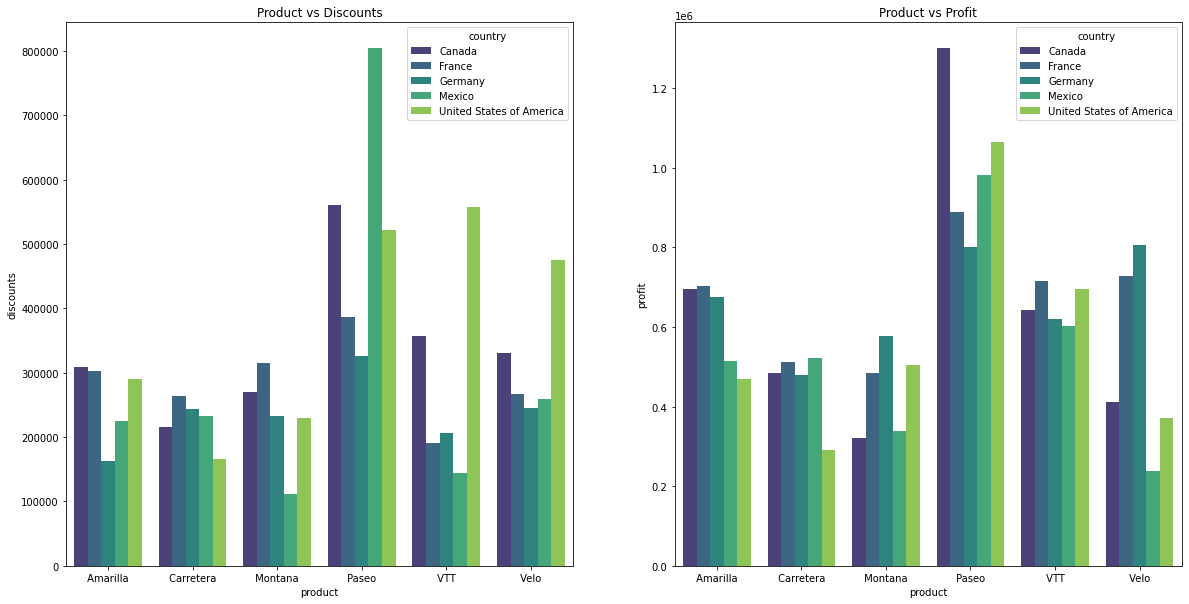

<Figure size 432x288 with 0 Axes>

In [ ]:
product_country = finance[['product','discounts', 'units_sold', 'profit', 'country']].groupby(['product','country']).sum().reset_index()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x='product', y='discounts', data=product_country, hue='country', palette='viridis')
plt.title('Product vs Discounts')

plt.subplot(1,2,2)
sns.barplot(x='product', y='profit', data=product_country, hue='country', palette='viridis')
plt.title('Product vs Profit')

plt.show()

insight : 
- america, mexic (it good as campare to america) , it not good performaing after giving good amount
- germany, france, and canada perfrom well and good 

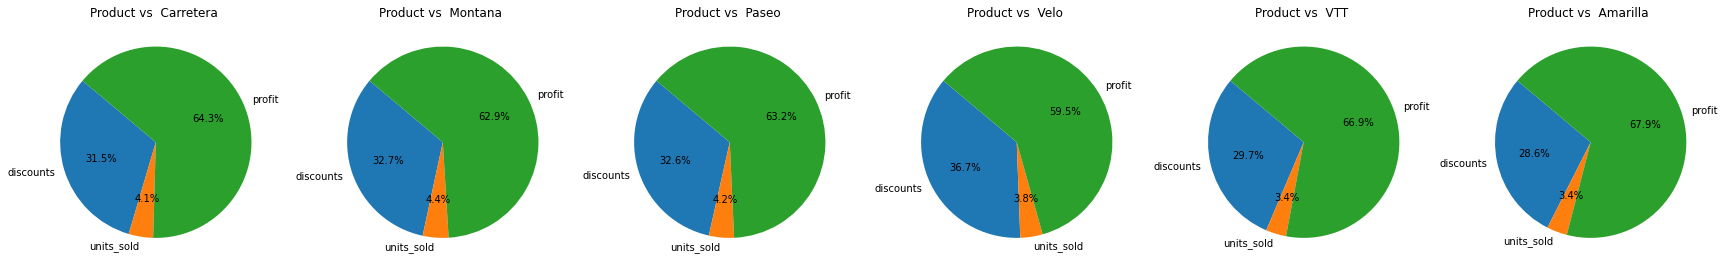

<Figure size 432x288 with 0 Axes>

In [ ]:
product_segment = finance[['product','discounts', 'units_sold', 'profit', 'segment']].groupby(['product']).sum().reset_index()


product_melt = product_segment.melt(id_vars='product', value_vars=['discounts', 'units_sold', 'profit'], var_name='product_metrics', value_name='values')

plt.figure(figsize=(30,13))

prod = finance['product'].unique().tolist()

for i in prod:
    
	plt.subplot(1, len(prod),  prod.index(i)+1) 

	prod_data = product_melt[product_melt['product'] == i]
	# sns.barplot(x='product_metrics', y='values', data=prod_data, palette='viridis')
	plt.pie(prod_data['values'], labels=prod_data['product_metrics'], autopct='%1.1f%%', startangle=140)
	plt.title(f'Product vs {i}')

plt.show()

insight:
- from low amount discount a give in vtt and amarilla , then we sold good amount bycycle and good amount profit
- from velo , not good performanace in market, after giving good amount of discount they did n't able sold out and give good amount of profit
- from carretera , montana, paseso are very good perfromance in market 

 - How does the overall sales trend vary with different discount strategies over time?

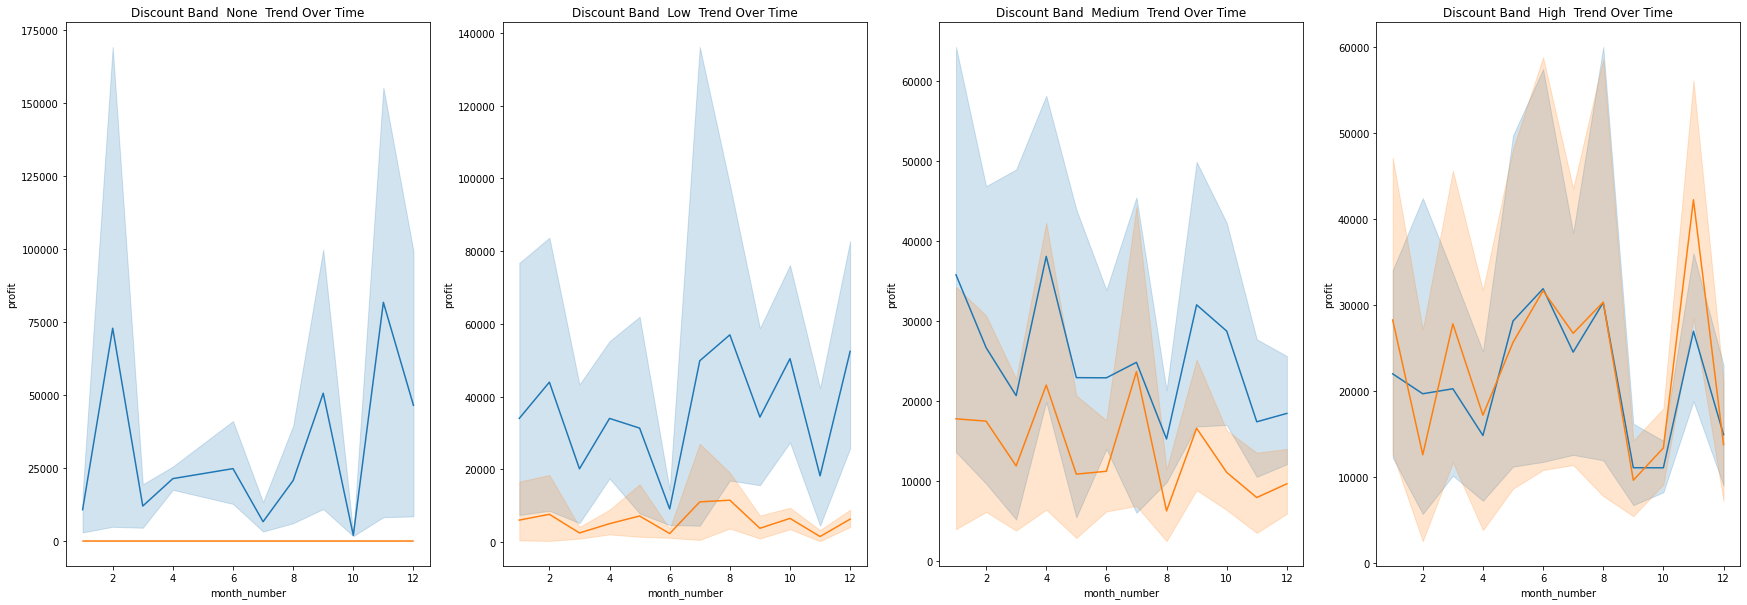

<Figure size 432x288 with 0 Axes>

In [ ]:
discount_trend = finance[['discount_band','discounts', 'profit','date', 'month_number', 'month_name', 'year']]
discount_trend

plt.figure(figsize=(30,10))

band = discount_trend['discount_band'].unique().tolist()

for b in band:
    
	band_data = discount_trend[discount_trend['discount_band'] == b]
	
	plt.subplot(1, len(band),  band.index(b)+1)
	sns.lineplot(x='month_number', y='profit', data=band_data, palette='viridis')
	sns.lineplot(x='month_number', y='discounts', data=band_data, palette='viridis')
	plt.title(f'Discount Band {b} Trend Over Time')

plt.show()

insight: 
- from data show that if give more discount there is loss get by company
- from medium there low amount of profit a get
- from low amount of discount , we good amount of discount
- from none discount, there good amount of pofit 

insight - here clearly show that the there is not need to give high level discount if there is no need or not special reason, 
campany can give some about of discount

# **Personal intreset** 

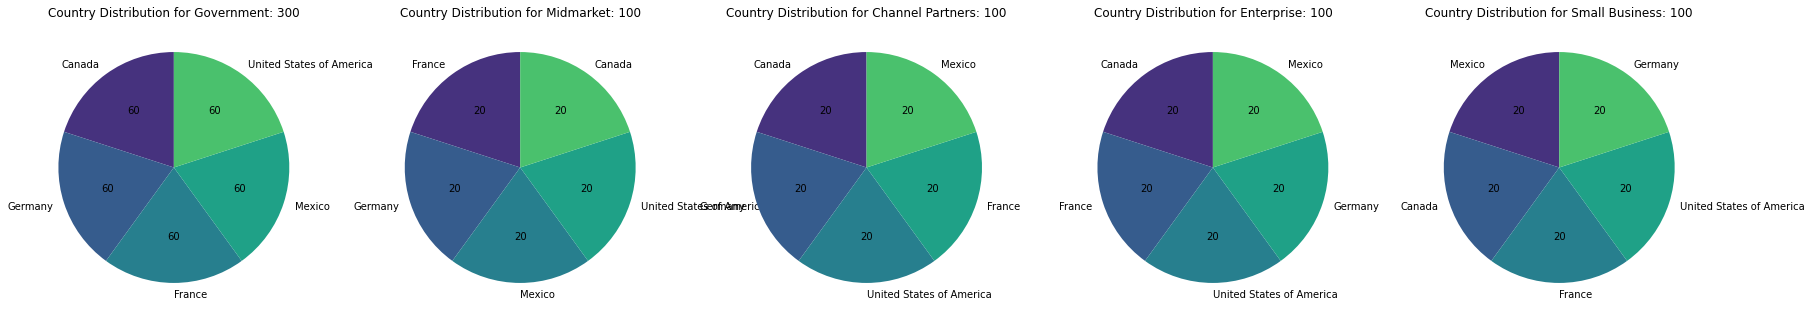

In [26]:
df = finance[['segment','country']]

count_segement =  df['segment'].unique().tolist()

plt.figure(figsize=(30,10))
for seg in count_segement:
	
	seg_data = df[df['segment'] == seg]
	
	plt.subplot(1,len(count_segement), count_segement.index(seg)+1)
	plt.pie(seg_data['country'].value_counts(), labels=seg_data['country'].value_counts().index,autopct=lambda p: f'{(p * sum(seg_data["country"].value_counts()) / 100):.0f}', startangle=90, colors=sns.color_palette('viridis'))
	plt.title(f'Country Distribution for {seg}: {seg_data.shape[0]}')

plt.show()

insight: perpect data (fiction data)

## **Important Insights and Suggestions**

- **Profit Margin Across Segment and Region:**
	- Government and Small Business segments yield the highest profits.
	- Mexico, Germany, and France contribute significantly to the company's profits.
	- Suggestion: Focus marketing and resources on Government and Small Business segments in Mexico, Germany, and France.

- **Correlation between Discounts, Manufacturing Prices, and Profit:**
	- No significant correlation between discounts and manufacturing prices.
	- Suggestion: Reevaluate discount strategies as they do not significantly impact manufacturing costs.

- **Profit Trends Over Time:**
	- 2013 shows a spike in profits in November.
	- 2014 has high profits in September, December, and February.
	- Suggestion: Plan promotions and inventory for peak months to maximize profits.

- **Discount Impact on Sales and Profit:**
	- High discounts lead to losses, while low discounts maintain profitability.
	- Suggestion: Avoid high discounts unless necessary; focus on low to medium discounts.

- **Product Performance by Region:**
	- VTT and Amarilla perform well with low discounts.
	- Velo underperforms despite high discounts.
	- Suggestion: Increase focus on VTT and Amarilla; reassess strategy for Velo.

- **Sales Trend with Discount Strategies:**
	- High discounts result in losses, while no discounts yield good profits.
	- Suggestion: Implement minimal discount strategies to maintain profitability.